# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os 
import time
from scipy.stats import linregress

 
from api_keys import weather_api_key
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
import requests
import pandas as pd

# Set the API base URL
weather_api_key = '5b7732bc23960e326107c1f0c440a80d'
url = "https://api.openweathermap.org/data/2.5/weather?appid=%s&units=imperial&q=" % weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city 
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Increment by 1 to the record count 
    record_count += 1

    # Runs an API request for each of the cities
    try:
        # Parses JSON and retrieves data accordingly 
        city_weather = requests.get(city_url).json()

        # Parses latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Adds the city information into the empty list above 
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except Exception as e:
        print("City not found {}. Skipping... Error: {}".format(city, e))
        pass
              
# Highlights that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadibu
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | nadym
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | la passe
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | woolgoolga
Processing Record 14 of Set 1 | maues
Processing Record 15 of Set 1 | vingt cinq
City not found vingt cinq. Skipping... Error: 'coord'
Processing Record 16 of Set 1 | thabazimbi
Processing Record 17 of Set 1 | nogliki
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | bemetara
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | vorgashor
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [8]:
# Displays sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadibu,12.6500,54.0333,81.23,60,7,12.35,YE,1707896652
1,isafjordur,66.0755,-23.1240,33.84,69,75,12.66,IS,1707896653
2,nadym,65.5333,72.5167,-20.99,92,7,15.30,RU,1707896654
3,ushuaia,-54.8000,-68.3000,47.86,61,75,4.61,AR,1707896469
4,port-aux-francais,-49.3500,70.2167,47.05,91,100,23.35,TF,1707896655


In [9]:
# Exports the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Reads the saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Displays sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,81.23,60,7,12.35,YE,1707896652
1,isafjordur,66.0755,-23.1240,33.84,69,75,12.66,IS,1707896653
2,nadym,65.5333,72.5167,-20.99,92,7,15.30,RU,1707896654
3,ushuaia,-54.8000,-68.3000,47.86,61,75,4.61,AR,1707896469
4,port-aux-francais,-49.3500,70.2167,47.05,91,100,23.35,TF,1707896655


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

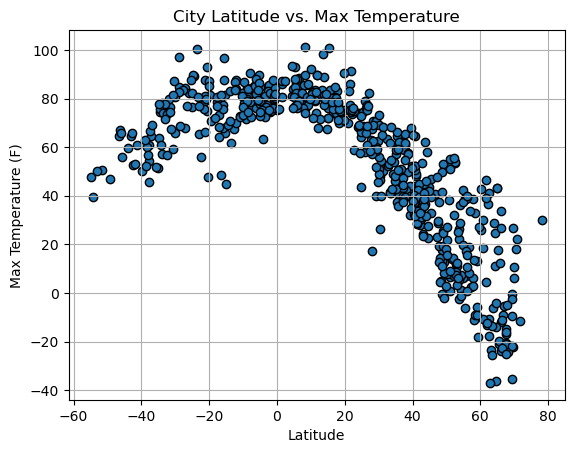

In [17]:
#Build a scatter plot for Latitude vs. Max Temperature  
import matplotlib.pyplot as plt


plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black") #Groups both columns together from the city dataframe 

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

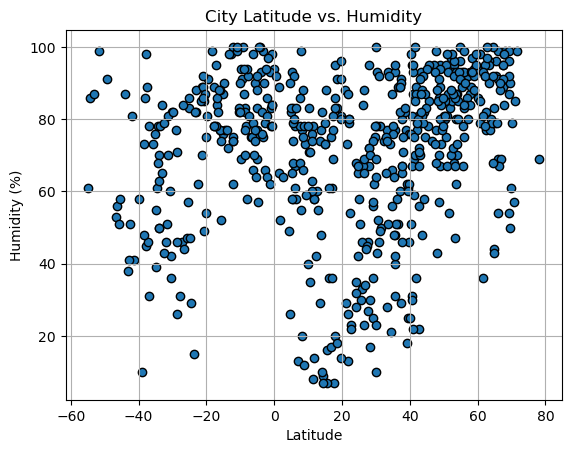

In [18]:
# Build the scatter plots for latitude vs. humidity  
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black") #Groups both columns together from the city dataframe 

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

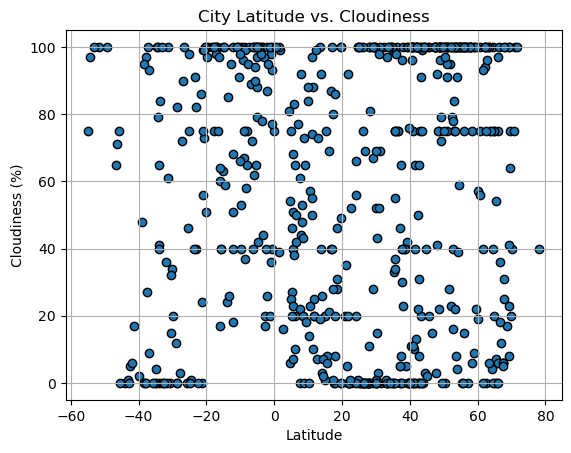

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black") #Groups both columns together from the city dataframe 

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()


#### Latitude vs. Wind Speed Plot

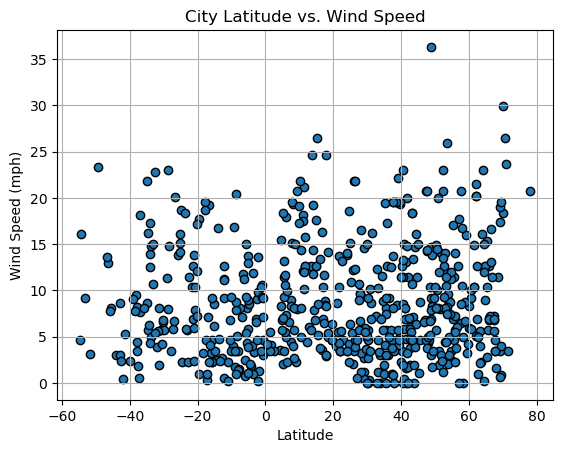

In [20]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black") #Groups both columns together from the city dataframe 

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()
